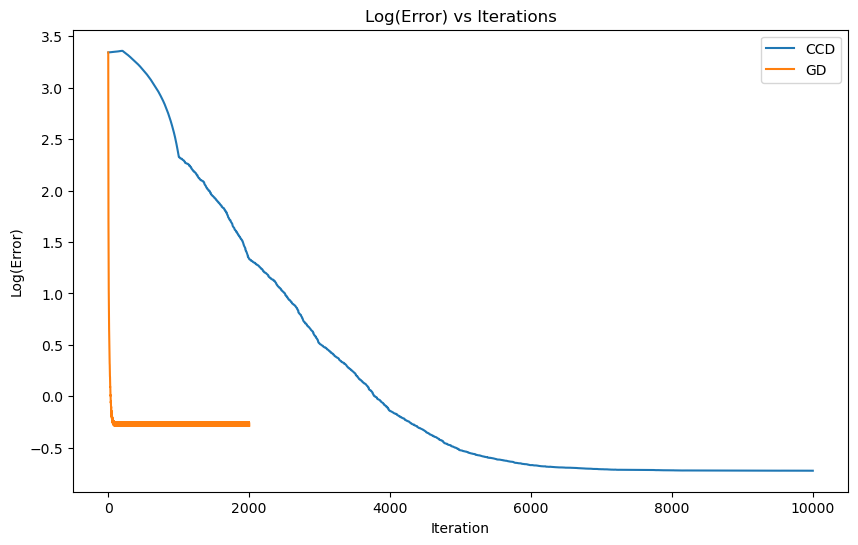

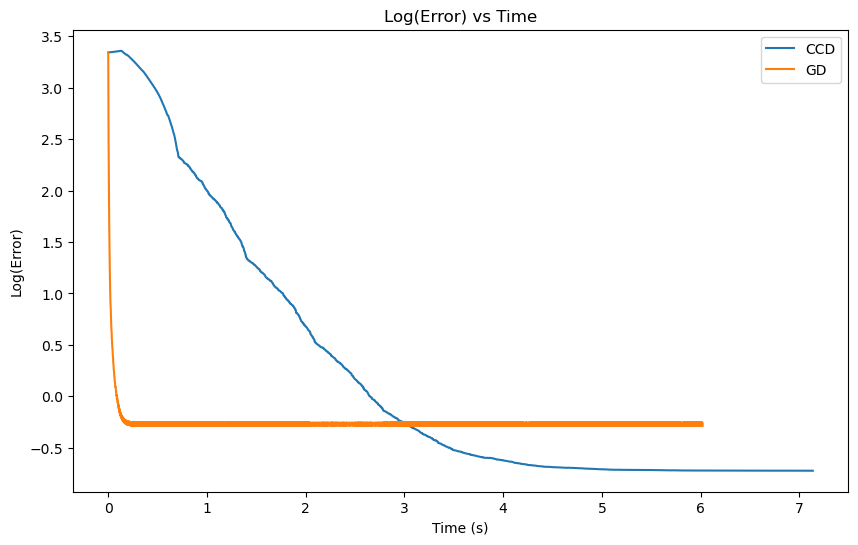

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(0)
n = 5000
m = 1000
z = 200

# Generate data
A = np.random.normal(0, 1, (n, m))
x_star = np.concatenate((np.zeros(z), np.ones(m - z)))
epsilon = np.random.normal(0, 1, n)
b = A @ x_star + epsilon

# Objective function and gradients
def F(x):
    return (np.linalg.norm(A @ x - b))**2 / n

def dF(x):
    return 2 * (A.T @ (A @ x - b)) / n

def partialF(x, j):
    return 2 * A[:, j].T @ (A @ x - b) / n

# Cyclic Coordinate Descent
def CCD(step_size, max_iter, x_0, tol=1e-6):
    start_time = time.time()
    times = [0]
    x_k = x_0.copy()
    errors = [np.linalg.norm(x_k - x_star)]
    for i in range(max_iter):
        j = i % m  # Cyclic coordinate update
        x_k[j] -= step_size * partialF(x_k, j)
        errors.append(np.linalg.norm(x_k - x_star))
        times.append(time.time() - start_time)
        if errors[-1] < tol:
            break
    log_errors = np.log(errors)
    return log_errors, times

# Gradient Descent
def GD(step_size, max_iter, x_0, tol=1e-6):
    start_time = time.time()
    times = [0]
    x_k = x_0.copy()
    errors = [np.linalg.norm(x_k - x_star)]
    for i in range(max_iter):
        x_k -= step_size * dF(x_k)
        errors.append(np.linalg.norm(x_k - x_star))
        times.append(time.time() - start_time)
        if errors[-1] < tol:
            break
    log_errors = np.log(errors)
    return log_errors, times

# Initialize parameters
H = A.T @ A / n
t = 1 / np.max(np.linalg.eigvalsh(H))  # Step size for GD
n_iter_1 = 10000  # Match iteration counts for fairness
n_iter_2 = 2000
x_0 = np.zeros(m)

# Run CCD and GD
ccd_log_error, ccd_time = CCD(step_size=t, max_iter=n_iter_1, x_0=x_0)
gd_log_error, gd_time = GD(step_size=t, max_iter=n_iter_2, x_0=x_0)

# Plot log error vs. iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(ccd_log_error)), ccd_log_error, label="CCD")
plt.plot(np.arange(len(gd_log_error)), gd_log_error, label="GD")
plt.xlabel("Iteration")
plt.ylabel("Log(Error)")
plt.title("Log(Error) vs Iterations")
plt.legend()
plt.show()

# Plot log error vs. wall-clock time
plt.figure(figsize=(10, 6))
plt.plot(ccd_time, ccd_log_error, label="CCD")
plt.plot(gd_time, gd_log_error, label="GD")
plt.xlabel("Time (s)")
plt.ylabel("Log(Error)")
plt.title("Log(Error) vs Time")
plt.legend()
plt.show()